If want bear multi classifier:
a) Have some more pictures with non bear and multi bear.
b) Add those pictures to the proper directory. Add labels as needed.
c) Run once with original classifier.

In [3]:
#hide
! [ -e /content ] && pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
! [ -e /content ] && pip3 install -Uqq fastbook
import fastbook
fastbook.setup_book()

/home/asthanaamish/miniconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [8]:
from fastbook import *
from fastai.vision.widgets import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(search_images_ddg(term, max_images=max_images))

In [9]:
bear_types = 'grizzly','black','teddy','Multiple types of' 
path = Path('bears')

from time import sleep
for o in bear_types:
    dest = (path/o)
    try:
        dest.mkdir(exist_ok=False, parents=True)
        download_images(dest, urls=search_images(f'{o} bear photo'))
        sleep(10)  # Pause between searches to avoid over-loading server
        download_images(dest, urls=search_images(f'{o} bear photo'))
        sleep(10)
        download_images(dest, urls=search_images(f'{o} bear photo'))
        sleep(10)
        resize_images(path/o, max_size=400, dest=path/o)
    except FileExistsError:
        pass


In [10]:
fns = get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink);

/home/asthanaamish/miniconda3/lib/python3.11/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


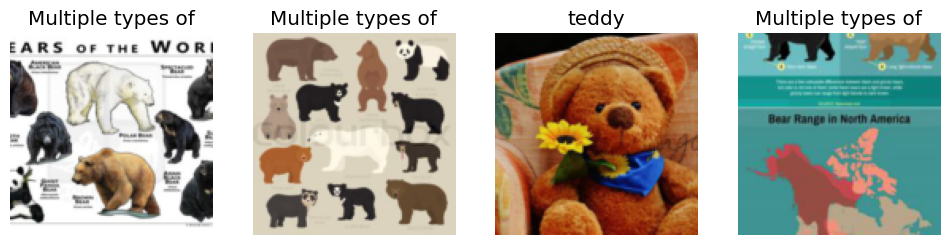

In [11]:
beardDB = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = beardDB.dataloaders(path)

dls.valid.show_batch(max_n=4, nrows=1)

In [12]:
beardDB = beardDB.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = beardDB.dataloaders(path)

In [7]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,2.096300,0.434882,0.117647,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.583400,0.236580,0.044118,00:22
1,0.492822,0.125198,0.044118,00:24
2,0.385246,0.059947,0.014706,00:24
3,0.303315,0.008895,0.000000,00:23
4,0.251148,0.004011,0.000000,00:23
5,0.211457,0.004985,0.000000,00:24
6,0.190875,0.003153,0.000000,00:23
7,0.172564,0.002057,0.000000,00:23
8,0.152755,0.001685,0.000000,00:24
9,0.136524,0.001877,0.000000,00:24


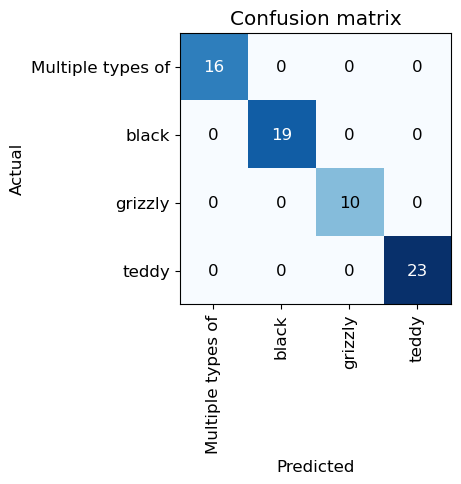

In [8]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

/home/asthanaamish/miniconda3/lib/python3.11/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


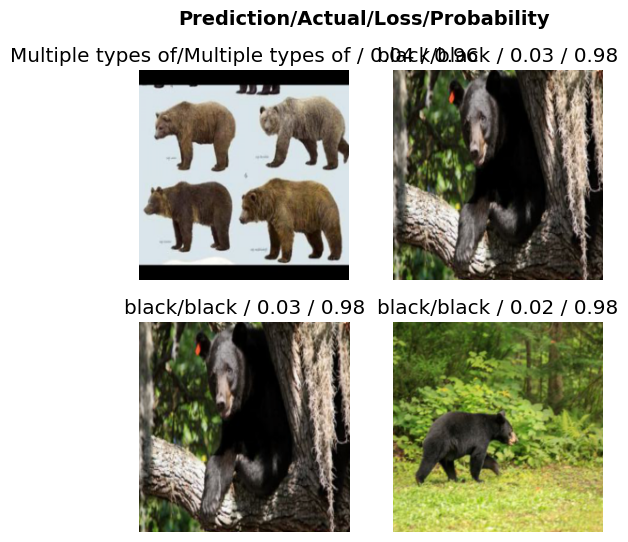

In [9]:
interp.plot_top_losses(4, nrows=2)

In [15]:
def parentlabel(x):
  return [x.parent.name] # as get_y recieve a list

In [16]:
beardDBMulti = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parentlabel,
    item_tfms=Resize(128))

beardDBMulti = beardDBMulti.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dlsNew = beardDBMulti.dataloaders(path)

x,y = to_cpu(dls.train.one_batch())
x.shape,y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [18]:
learnMulti = vision_learner(dls, resnet50, metrics=partial(accuracy_multi, thresh=0.2))
#learnMulti.fine_tune(3, base_lr=3e-3, freeze_epochs=4)
learnMulti.fine_tune(3, base_lr=3e-3)

epoch,train_loss,valid_loss,accuracy_multi,time


AssertionError: Exception occured in `Recorder` when calling event `after_batch`:
	==:
256
64